- e.g. geo point -> -13616745.35, 6053765.846
- Format: Web Mercator projection (EPSG:3857)
- These aren't traditional latitude and longitude values, but projected meters from the origin point at (0°, 0°).

In [52]:
# Import necessary libraries
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import box
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd


In [53]:
# Load CSV file into a pandas DataFrame
# csv_file_path = 'HistoricTrafficData_2022.csv'
# traffic = pd.read_csv(csv_file_path)
# Display the first few rows
# traffic.head()

# Load CSV file into a GeoDataFrame
csv_file_path = 'HistoricTrafficData_2022.csv'
geotraffic = gpd.read_file(csv_file_path)

# Display the first few rows
geotraffic.head()

,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear,x,y
0,1,12/31/2022 8:00:00 AM,522,522,,,0,16000,1.79,0.35,0.02,South,AT MILEPOST 0.00: DECREASING MISCELLANEOUS FEA...,ba70851c-a52a-4999-bf67-cd381e16d300,2022,-13616745.348788,6053765.8457447
1,2,12/31/2022 8:00:00 AM,002,002,,,0.12,8100,,,,West,EAST OF MILEPOST 0.11B: EXIT TO WALNUT ST,cd6a4d4a-7a82-4c82-a4db-6a0242b5cf85,2022,-13601945.2492432,6103656.06106258
2,3,12/31/2022 8:00:00 AM,002,002,,,0.01,5100,2.69,0.53,0,West,EAST OF MILEPOST 0.00B: SR 529-MAPLE ST INTERS...,7bc44465-3632-4ef8-98a2-003c628634b4,2022,-13602214.112291,6103598.69184248
3,4,12/31/2022 8:00:00 AM,536,536,,,0.01,3300,3.75,0.75,0.03,North,SOUTH OF MILEPOST 0.00: SR 20 INTERSECTION; BE...,4c67b09e-d898-4acf-8545-0de10ac0026c,2022,-13628986.2674165,6181395.67336803
4,5,12/31/2022 8:00:00 AM,302,302,,,16.87,12000,3.21,1.42,0.67,Northwest,AT MILEPOST 16.87: SR 16 WB UNDERCROSSING; END...,e34b4b3c-6d5a-4317-9d0e-c59541c77d95,2022,-13649864.7938107,6002893.21627168


In [54]:
# Assuming your CSV has columns 'x' and 'y' in Web Mercator (EPSG:3857)
geometry = [Point(xy) for xy in zip(geotraffic['x'], geotraffic['y'])]
geotraffic = gpd.GeoDataFrame(geotraffic, geometry=geometry, crs="EPSG:3857")

# Display the first few rows
geotraffic.head()

,OBJECTID,LRSDate,RouteIdentifier,StateRouteNumber,RelatedRouteType,RelatedRouteQualifier,AccumulatedRouteMile,AADT,SingleUnitTruckPct,DoubleUnitTruckPct,TripleUnitTruckPct,DirectionOfTravel,Location,GlobalID,ReportingYear,x,y,geometry
0,1,12/31/2022 8:00:00 AM,522,522,,,0,16000,1.79,0.35,0.02,South,AT MILEPOST 0.00: DECREASING MISCELLANEOUS FEA...,ba70851c-a52a-4999-bf67-cd381e16d300,2022,-13616745.348788,6053765.8457447,POINT (-13616745.349 6053765.846)
1,2,12/31/2022 8:00:00 AM,002,002,,,0.12,8100,,,,West,EAST OF MILEPOST 0.11B: EXIT TO WALNUT ST,cd6a4d4a-7a82-4c82-a4db-6a0242b5cf85,2022,-13601945.2492432,6103656.06106258,POINT (-13601945.249 6103656.061)
2,3,12/31/2022 8:00:00 AM,002,002,,,0.01,5100,2.69,0.53,0,West,EAST OF MILEPOST 0.00B: SR 529-MAPLE ST INTERS...,7bc44465-3632-4ef8-98a2-003c628634b4,2022,-13602214.112291,6103598.69184248,POINT (-13602214.112 6103598.692)
3,4,12/31/2022 8:00:00 AM,536,536,,,0.01,3300,3.75,0.75,0.03,North,SOUTH OF MILEPOST 0.00: SR 20 INTERSECTION; BE...,4c67b09e-d898-4acf-8545-0de10ac0026c,2022,-13628986.2674165,6181395.67336803,POINT (-13628986.267 6181395.673)
4,5,12/31/2022 8:00:00 AM,302,302,,,16.87,12000,3.21,1.42,0.67,Northwest,AT MILEPOST 16.87: SR 16 WB UNDERCROSSING; END...,e34b4b3c-6d5a-4317-9d0e-c59541c77d95,2022,-13649864.7938107,6002893.21627168,POINT (-13649864.794 6002893.216)


In [55]:
def lonlat_to_webmercator(lon, lat):
    import math
    r_major = 6378137.0
    x = r_major * math.radians(lon)
    scale = x / lon if lon != 0 else 1
    y = (
        r_major
        * math.log(math.tan((math.pi / 4) + (math.radians(lat) / 2)))
    )
    return x, y

minx, miny = lonlat_to_webmercator(-124.848974, 45.543541)
maxx, maxy = lonlat_to_webmercator(-116.916031, 49.002494)
wa_box = box(minx, miny, maxx, maxy)

# Clip to Washington State
wa_traffic = geotraffic.clip(wa_box)

In [56]:
geotraffic['AADT'] = geotraffic['AADT'].astype(int)
geotraffic['AADT'].describe()

count      6358.000000
mean      17672.008493
std       29890.205548
min          20.000000
25%        3000.000000
50%        7600.000000
75%       18000.000000
max      247000.000000
Name: AADT, dtype: float64

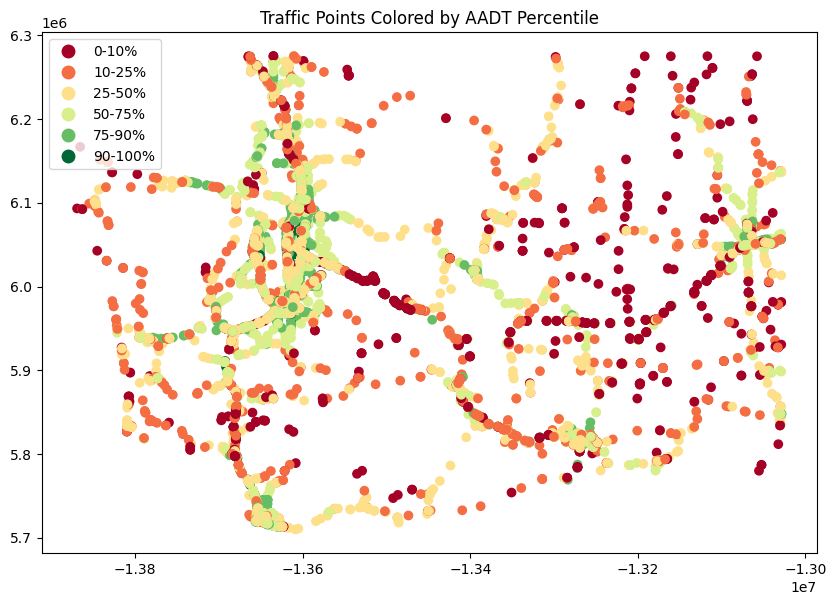

In [59]:
# Calculate AADT percentiles
percentiles = [0, 10, 25, 50, 75, 90, 100]
aadt_bins = geotraffic['AADT'].quantile([p/100 for p in percentiles]).values

# Assign percentile labels to each point
labels = ['0-10%', '10-25%', '25-50%', '50-75%', '75-90%', '90-100%']
geotraffic['AADT_percentile'] = pd.cut(
    geotraffic['AADT'],
    bins=aadt_bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop'
)

# Plot with color based on percentile
fig, ax = plt.subplots(figsize=(10, 8))
geotraffic.plot(
    ax=ax,
    column='AADT_percentile',
    legend=True,
    cmap='RdYlGn'
)
plt.title('Traffic Points Colored by AADT Percentile')
plt.show()